In [30]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
apl = yf.Ticker("AAPL").history(period='5y')

In [13]:
tsl = yf.Ticker("TSLA").history(period='5y')

In [15]:
snp = yf.Ticker("^GSPC").history(period='5y')

In [36]:
snpprice = snp[['Close']]
snpprice

,Close
Date,
2017-11-03 00:00:00-04:00,2587.840088
2017-11-06 00:00:00-05:00,2591.129883
2017-11-07 00:00:00-05:00,2590.639893
2017-11-08 00:00:00-05:00,2594.379883
2017-11-09 00:00:00-05:00,2584.620117
...,...
2022-10-27 00:00:00-04:00,3807.300049
2022-10-28 00:00:00-04:00,3901.060059
2022-10-31 00:00:00-04:00,3871.979980


In [19]:
tslprice = tsl[['Close']]

In [20]:
aplprice = apl[['Close']]

In [54]:
tickers = ['^GSPC', 'pfe', 'rcl', 'tte.pa']

df = yf.Tickers(tickers).download(ticker=tickers, period='5y')['Close']

[*********************100%***********************]  4 of 4 completed


In [55]:
df

,PFE,RCL,TTE.PA,^GSPC
Date,,,,
2017-11-03,28.102236,115.771469,35.691753,2587.840088
2017-11-06,27.920418,117.801559,35.794838,2591.129883
2017-11-07,27.952047,121.457611,35.997314,2590.639893
2017-11-08,27.936232,121.166252,36.023087,2594.379883
2017-11-09,28.079819,119.051567,35.758015,2584.620117
...,...,...,...,...
2022-10-28,47.430000,52.669998,54.590000,3901.060059
2022-10-31,46.549999,53.380001,55.099998,3871.979980
2022-11-01,48.009998,51.980000,56.500000,3856.100098


In [56]:
df.corr(method='spearman')

,PFE,RCL,TTE.PA,^GSPC
PFE,1.000000,-0.343228,0.570703,0.729075
RCL,-0.343228,1.000000,0.104094,-0.484433
TTE.PA,0.570703,0.104094,1.000000,0.245543
^GSPC,0.729075,-0.484433,0.245543,1.000000


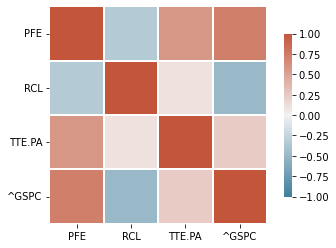

In [57]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(
        data=df.corr(method='spearman'),  # our correlation matrix
        linewidths=0.3,  # the width of lines separating the matrix squares
        square=True,   # enforce 1:1 ratios among correlation cells
        cmap=cmap,  # use the color map we defined above
        vmax=1,  # define the max of our correlation scale
        vmin=-1, # define the min of our correlation scale
        center=0,  # The value at which the color map is centered about (white)
        cbar_kws={"shrink": .75}  # shrink the scale a bit
    )
# adjust y-axis ticks for legibility
plt.yticks(rotation=0)  
# show the heatmap
plt.show()
